In [88]:
import cv2 

img=cv2.imread("./Images/download_1.png")
img=cv2.resize(img,(825,525))

#cv2.imshow("img",img)
img.shape

(525, 825, 3)

In [73]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.GaussianBlur(img,(3,3),0)


In [75]:
thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# OCR WITH EASY-OCR(OpenCV)

In [4]:
import easyocr

In [5]:
reader = easyocr.Reader(['en'],gpu=True)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [52]:
results = reader.readtext(thresh)
for (bbox, text, prob) in results:
    print(f"Text: {text}, Bounding Box: {bbox}, Confidence: {prob}")

Text: It was the best of, Bounding Box: [[16, 20], [632, 20], [632, 101], [16, 101]], Confidence: 0.8475901896263022
Text: times, it was the worst, Bounding Box: [[7, 114], [807, 114], [807, 213], [7, 213]], Confidence: 0.7483337179113219
Text: of times, it was the age, Bounding Box: [[11, 211], [823, 211], [823, 321], [11, 321]], Confidence: 0.7547418889697523
Text: of wisdom, it was the, Bounding Box: [[12, 305], [762, 305], [762, 408], [12, 408]], Confidence: 0.8987012286757368
Text: age of foolishness_, Bounding Box: [[11, 409], [683, 409], [683, 517], [11, 517]], Confidence: 0.9401857195681449


In [34]:
cv2.imshow("img",thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Using Keras_OCR

In [6]:
import keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\agarw\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\agarw\.keras-ocr\crnn_kurapan.h5


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [101]:
img2=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
img2

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [81]:
#we need to pass a list in the recognise model 
results = pipeline.recognize([img2])

1/1 [==============================] - 16s 16s/step


In [103]:
results

[[('best',
   array([[384.5647  ,  26.261421],
          [531.16705 ,  30.069275],
          [529.52167 ,  93.416145],
          [382.9193  ,  89.60829 ]], dtype=float32)),
  ('the',
   array([[249.34727 ,  27.264254],
          [361.66595 ,  28.72293 ],
          [360.85278 ,  91.335754],
          [248.5341  ,  89.877075]], dtype=float32)),
  ('it',
   array([[20., 29.],
          [83., 29.],
          [83., 90.],
          [20., 90.]], dtype=float32)),
  ('of',
   array([[545.73206 ,  33.336685],
          [628.62964 ,  27.27101 ],
          [632.9929  ,  86.90296 ],
          [550.09534 ,  92.968636]], dtype=float32)),
  ('was',
   array([[106.00001 ,  46.999996],
          [228.      ,  47.      ],
          [228.      ,  90.999985],
          [106.00001 ,  90.999985]], dtype=float32)),
  ('the',
   array([[471.37253, 127.31654],
          [584.6261 , 128.78737],
          [583.82666, 190.3484 ],
          [470.5731 , 188.87758]], dtype=float32)),
  ('times',
   array([[ 22.005081

In [94]:
results[0]


[('best',
  array([[384.5647  ,  26.261421],
         [531.16705 ,  30.069275],
         [529.52167 ,  93.416145],
         [382.9193  ,  89.60829 ]], dtype=float32)),
 ('the',
  array([[249.34727 ,  27.264254],
         [361.66595 ,  28.72293 ],
         [360.85278 ,  91.335754],
         [248.5341  ,  89.877075]], dtype=float32)),
 ('it',
  array([[20., 29.],
         [83., 29.],
         [83., 90.],
         [20., 90.]], dtype=float32)),
 ('of',
  array([[545.73206 ,  33.336685],
         [628.62964 ,  27.27101 ],
         [632.9929  ,  86.90296 ],
         [550.09534 ,  92.968636]], dtype=float32)),
 ('was',
  array([[106.00001 ,  46.999996],
         [228.      ,  47.      ],
         [228.      ,  90.999985],
         [106.00001 ,  90.999985]], dtype=float32)),
 ('the',
  array([[471.37253, 127.31654],
         [584.6261 , 128.78737],
         [583.82666, 190.3484 ],
         [470.5731 , 188.87758]], dtype=float32)),
 ('times',
  array([[ 22.005081, 128.27069 ],
         [234.258

In [70]:
img1=images[0]
img1.shape

(2212, 2400, 3)

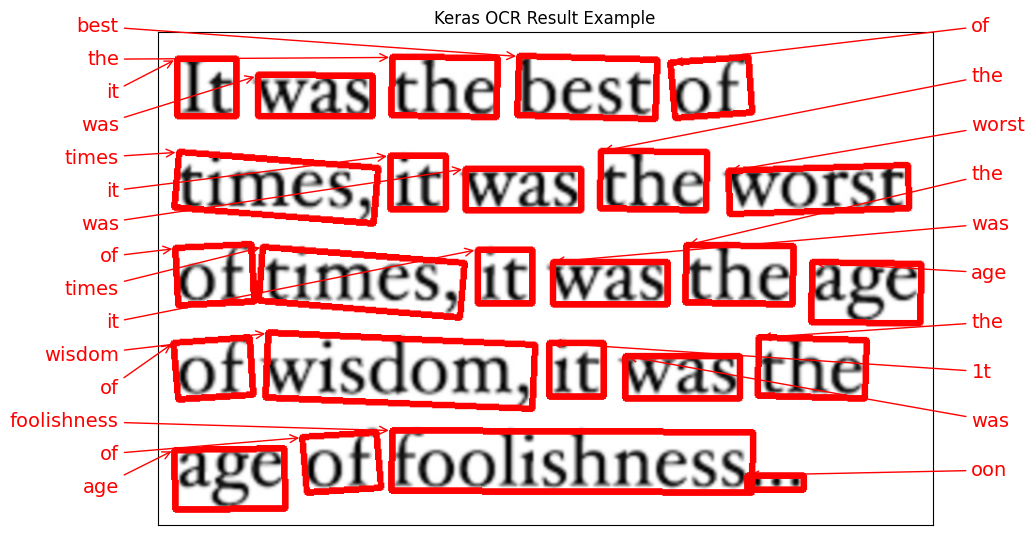

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(img2, results[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()

# Comparison of the 2 models 

In [18]:
images = [
    keras_ocr.tools.read(url) for url in [
        'https://upload.wikimedia.org/wikipedia/commons/b/bd/Army_Reserves_Recruitment_Banner_MOD_45156284.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/b/b4/EUBanana-500x112.jpg'
    ]
] 

In [24]:
for image in images:
    results_easy = reader.readtext(image)
    img_df = pd.DataFrame(results_easy, columns=['bbox','text','conf'])
    easy_list=[(rows['text'],np.array(rows['bbox'])) for index,rows in img_df.iterrows()]

In [25]:
easy_list

[('NO BANANA UNION', [[220, 16], [442, 16], [442, 42], [220, 42]]),
 ('NO', [[206, 72], [238, 72], [238, 96], [206, 96]]),
 ('SOFTWARE', [[246, 72], [356, 72], [356, 96], [246, 96]]),
 ('PAtEnTS', [[364, 72], [460, 72], [460, 96], [364, 96]])]

In [26]:
def compare(image):
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    results_easy = reader.readtext(image)
    img_df = pd.DataFrame(results_easy, columns=['bbox','text','conf'])
    easy_list=[(rows['text'],np.array(rows['bbox'])) for index,rows in img_df.iterrows()]

    keras_ocr.tools.drawAnnotations(image, easy_list, ax=axs[0])
    axs[0].set_title('Easy OCR Result Example')

    results_keras = pipeline.recognize([image])
    
    keras_ocr.tools.drawAnnotations(image, results_keras[0], ax=axs[1])
    axs[1].set_title('Keras OCR Result Example')
    plt.show()


1/1 [==============================] - 21s 21s/step


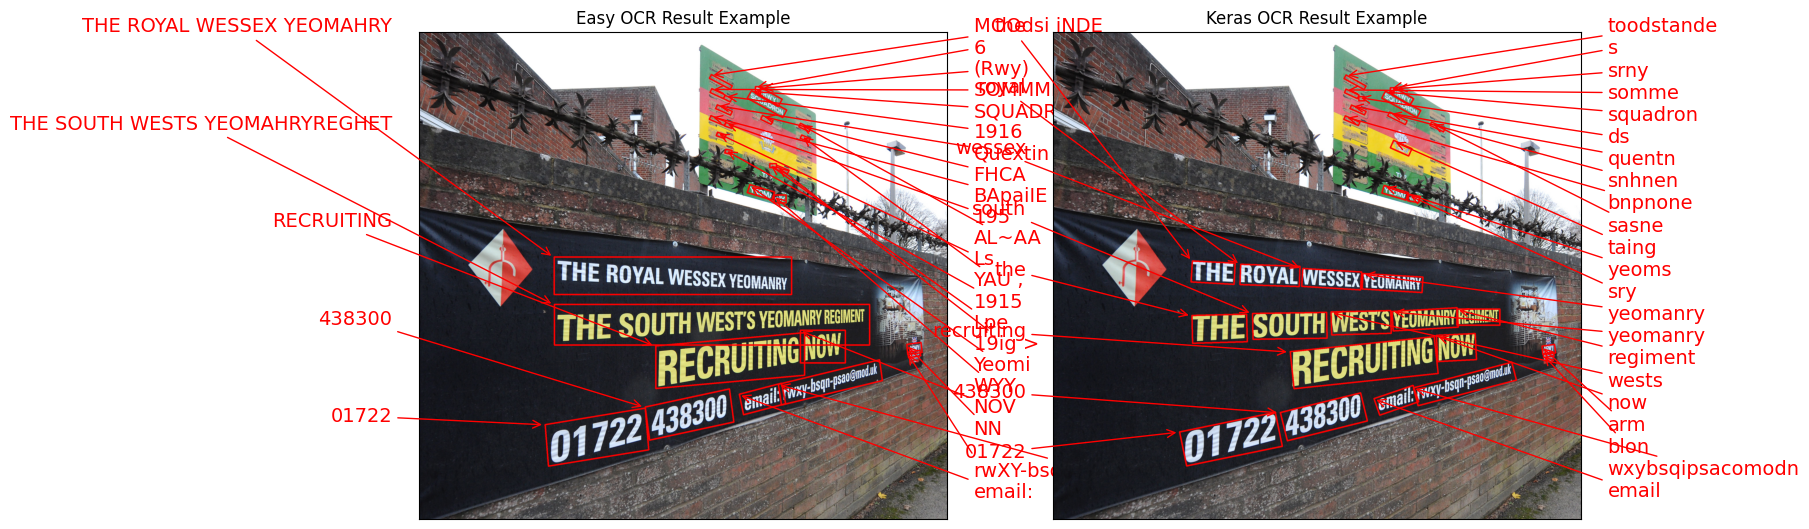

1/1 [==============================] - 1s 1s/step


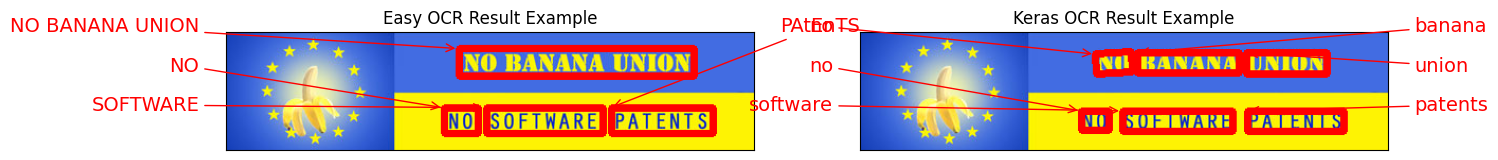

In [27]:
for image in images:
    compare(image)